# Análisis de Churn en el Sector de Telecomunicaciones – Telco Churn

### Introducción

Imagina que eres el gerente de una gran empresa de telecomunicaciones. Cada mes, nuevos clientes llegan y se suscriben a sus servicios, pero, al mismo tiempo, otros deciden cancelar sus suscripciones y cambiarse a la competencia. ¿Qué hace que un cliente siga siendo fiel? Y, más importante, ¿qué lleva a alguien a abandonar la empresa?

Este fenómeno se conoce como churn, uno de los indicadores más críticos para cualquier negocio basado en suscripciones o pagos recurrentes. Dado que el churn impacta directamente en los ingresos, comprender sus causas y cómo reducirlo es esencial para el éxito de la empresa. Disminuir esta métrica no solo significa mantener activa la base de clientes, sino también mejorar la previsibilidad de los ingresos y fortalecer la competitividad en el mercado.

Además, al analizar el churn, podemos identificar patrones y problemas específicos, como fallos en la integración, deficiencias en el soporte al cliente o características del producto que no satisfacen las necesidades de los usuarios.

En este proyecto, realizaremos un análisis para comprender mejor el comportamiento de los clientes y los motivos que los llevan a cancelar el servicio. Nuestro objetivo es responder dos preguntas esenciales:

✅ ¿Cuál es el perfil de los clientes de la empresa?
Mapear las principales características de los clientes, como edad, género, estado civil y presencia de dependientes, para entender mejor quiénes son los consumidores del servicio.

✅ ¿Qué factores influyen en la cancelación del servicio?
Investigar variables como el tiempo de permanencia, el método de pago y el monto gastado para identificar patrones que contribuyen al churn, permitiendo implementar estrategias para aumentar la retención.

A través del análisis exploratorio de datos y visualizaciones, extraeremos conocimientos valiosos para respaldar decisiones estratégicas y mejorar la retención de clientes.

### Fuente de datos

Fuente de Datos
Los datos utilizados en este análisis fueron extraídos del conjunto de datos Telco Customer Churn, disponible en Kaggle. El dataset se puede acceder a través del siguiente enlace:
🔗 [Telco Customer Churn - Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)

Este conjunto contiene 7,043 registros y 21 variables, que incluyen información sobre clientes, los servicios contratados y las cancelaciones. A continuación, se presenta una breve descripción de las variables:

* customerID: Identificador único de cada cliente.

* gender: Género del cliente (Female = Femenino, Male = Masculino).

* SeniorCitizen: Indica si el cliente es una persona mayor (1 = Sí, 0 = No).

* Partner: Indica si el cliente tiene pareja (Yes = Sí, No = No).

* Dependents: Indica si el cliente tiene personas a su cargo (Yes = Sí, No = No).

* tenure: Número de meses que el cliente ha permanecido en la empresa.

* PhoneService: Indica si el cliente tiene servicio telefónico (Yes = Sí, No = No).

* MultipleLines: Indica si el cliente tiene múltiples líneas telefónicas (Yes = Sí, No = No, No phone service = Sin servicio telefónico).

* InternetService: Tipo de servicio de internet contratado (DSL, Fiber Optic o No = Sin servicio de internet).

* OnlineSecurity: Indica si el cliente tiene servicio de seguridad en línea (Yes = Sí, No = No, No internet service = Sin servicio de internet).

* OnlineBackup: Indica si el cliente tiene servicio de respaldo en línea (Yes = Sí, No = No, No internet service = Sin servicio de internet).

* DeviceProtection: Indica si el cliente tiene protección de dispositivos (Yes = Sí, No = No, No internet service = Sin servicio de internet).

* TechSupport: Indica si el cliente tiene soporte técnico (Yes = Sí, No = No, No internet service = Sin servicio de internet).

* StreamingTV: Indica si el cliente tiene servicio de streaming de TV (Yes = Sí, No = No, No internet service = Sin servicio de internet).

* StreamingMovies: Indica si el cliente tiene servicio de streaming de películas (Yes = Sí, No = No, No internet service = Sin servicio de internet).

* Contract: Tipo de contrato del cliente (Month-to-month = Mensual, One year = Anual, Two year = Bienal).

* PaperlessBilling: Indica si el cliente utiliza facturación electrónica (Yes = Sí, No = No).

* PaymentMethod: Método de pago elegido por el cliente (Electronic check = Cheque electrónico, Mailed check = Cheque enviado por correo, Bank transfer (automatic) = Transferencia bancaria automática, Credit card = Tarjeta de crédito).

* MonthlyCharges: Valor mensual pagado por el cliente (en dólares).

* TotalCharges: Valor total pagado por el cliente a lo largo del período del contrato (en dólares).

* Churn: Indica si el cliente canceló el servicio (Yes = Sí, No = No).

###  Objetivos

Objetivos del Análisis

✅ Explorar el perfil de los clientes

Analizar características como género, presencia de dependientes, estado civil y edad para comprender mejor el público que utiliza los servicios de la empresa.

✅ Investigar patrones asociados al churn

Examinar cómo diferentes variables —como tiempo de permanencia, método de pago y perfil del cliente— se relacionan con la cancelación del servicio, permitiendo identificar factores clave para la retención de clientes.

### Análisis de Datos

#### Importación

In [90]:
# Importación de las bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from matplotlib.ticker import FuncFormatter

#Estilo de los gráficos
plt.style.use('ggplot')


#Configuración para exibir gráficos en el notebook
%matplotlib inline

# Evitar avisos desnecessarios
import warnings
warnings.filterwarnings('ignore')

In [91]:
# Importar el archivo CSV y convertirlo en un DataFrame 
telco = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

#### Exploración inicial del DataFrame

In [92]:
# Visualización de las primeras cinco filas del DataFrame
telco.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
# Exibir la estructura de los datos
print(f'Total de filas = {telco.shape[0]}')
print(f'Total de columnas = {telco.shape[1]}')

Total de filas = 7043
Total de columnas = 21


#### Tipos de datos

In [94]:
# Verificar los tipos de datos de cada columna
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Valores ausentes y duplicados

In [95]:
# Contar valores duplicados
num_duplicados = telco.duplicated().sum()
print(f'Número de registros duplicados: {num_duplicados}')

Número de registros duplicados: 0


In [96]:
# Contar valores ausentes por columna
print("\nValores nulos por columna:")
print(telco.isnull().sum())


Valores nulos por columna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


✅ No hay valores duplicados ni ausentes en el conjunto de datos.

#### Detección de Outliers

Para garantizar que nuestro análisis no se vea distorsionado, verificaremos la presencia de valores atípicos (outliers). Comenzaremos esta etapa utilizando la función describe(), que proporciona estadísticas descriptivas de las variables seleccionadas, y un diagrama de caja (boxplot) para facilitar la visualización de los datos.

In [97]:
# Estadísticas descriptivas de las variables tenure y MonthlyCharges
telco[['tenure', 'MonthlyCharges']].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


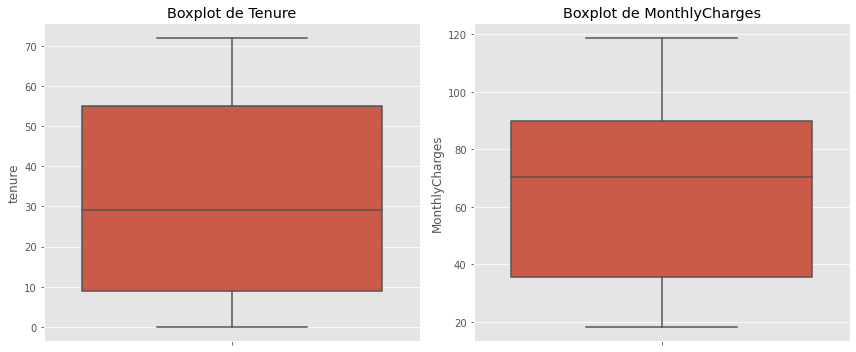

In [98]:
## Boxplot para Identificación de Outliers
# Creación de boxplots para las columnas tenure y MonthlyCharges
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=telco['tenure'])
plt.title('Boxplot de Tenure')

plt.subplot(1, 2, 2)
sns.boxplot(y=telco['MonthlyCharges'])
plt.title('Boxplot de MonthlyCharges')

plt.tight_layout()
plt.show()

Con base en la estadística descriptiva de la muestra y los boxplots, no se identificaron valores extremos. Por lo tanto, no es necesario realizar un tratamiento adicional para los outliers.

### Preguntas de negocio

#### 1 - ¿Cuál es la proporción de clientes que dieron churn en relación con el total de clientes?


In [99]:
churn_rate = (telco['Churn'] == 'Yes').sum() / telco['customerID'].count()
print(f'La proporción de clientes que dieron churn en relación con el total de clientes fue de: {churn_rate:.2%}')

La proporción de clientes que dieron churn en relación con el total de clientes fue de: 26.54%


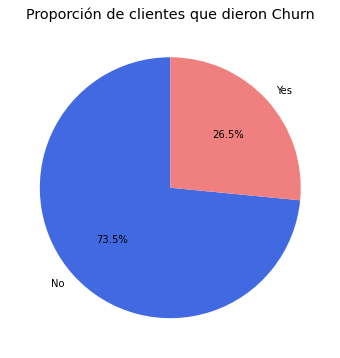

In [100]:
plt.figure(figsize=(6,6))
plt.pie(
    telco['Churn'].value_counts(),
    labels=telco['Churn'].value_counts().index,
    colors=["royalblue", "lightcoral"], 
    autopct="%1.1f%%", 
    startangle=90,
)

# Agregar título
plt.title("Proporción de clientes que dieron Churn")

# Mostrar gráfico
plt.show()

#### 2 - ¿Cuál es la distribución de los valores que los clientes pagan mensualmente?

In [101]:
telco['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

El valor mínimo pagado mensualmente es de 18,25 dólares y el máximo es de 118,75 dólares.
El pago medio mensual es de 64,76 dólares y la desviación estándar es 30,09, lo que indica una dispersión considerable en los valores.
La mediana (50%) es de 70,35 dólares, lo que significa que la mitad de los clientes paga menos que este valor y la otra mitad paga más.

Los cuartiles muestran que:

El 25% de los clientes paga hasta 35,50 dólares.

El 50% de los clientes paga hasta 70,35 dólares (mediana).

El 75% de los clientes paga hasta 89,85 dólares.

Visualicemos la distribución de los valores pagos mensualmente con un histograma:

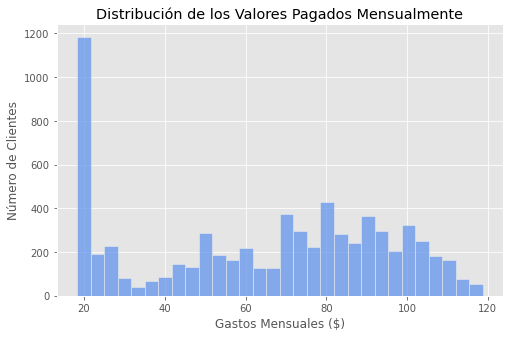

In [102]:
plt.figure(figsize=(8, 5))
sns.histplot(telco['MonthlyCharges'], bins=30, color='cornflowerblue')
plt.xlabel('Gastos Mensuales ($)')
plt.ylabel('Número de Clientes')
plt.title('Distribución de los Valores Pagados Mensualmente')
plt.show()

Se observa un pico en torno a los 20 dólares, lo que podría indicar un plan de entrada específico o un segmento de clientes que usa servicios mínimos. Luego, la distribución muestra una variedad de rangos de precios.

La presencia de clientes que pagan hasta 118,75 dólares indica una cola larga a la derecha, lo que sugiere que algunos clientes pagan valores altos, aunque son minoría.

El promedio de 64,76 dólares y la mediana de 70,35 dólares muestran una ligera asimetría negativa, pero el pico inicial podría estar sesgando la media hacia abajo.

#### 3 - ¿Cuáles son los métodos de pago más utilizados por los clientes?

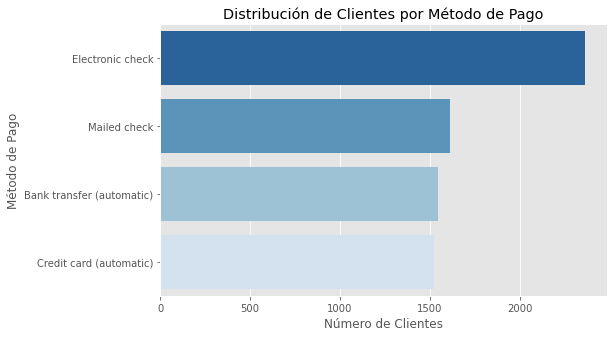

In [103]:
# Crear gráfico
plt.figure(figsize=(8,5))
sns.barplot(
    x=telco['PaymentMethod'].value_counts().values, 
    y=telco['PaymentMethod'].value_counts().index, 
    palette='Blues_r'
)  

# Agregar título
plt.ylabel("Método de Pago")
plt.xlabel("Número de Clientes")
plt.title("Distribución de Clientes por Método de Pago")

# Mostrar gráfico
plt.show()

El método de pago más común entre los clientes es el Electronic Check, seguido por Mailed check, Bank transfer (automatic) y Credit card (automatic).
Vamos verificar la relación entre el método de pago y el Churn con un gráfico:

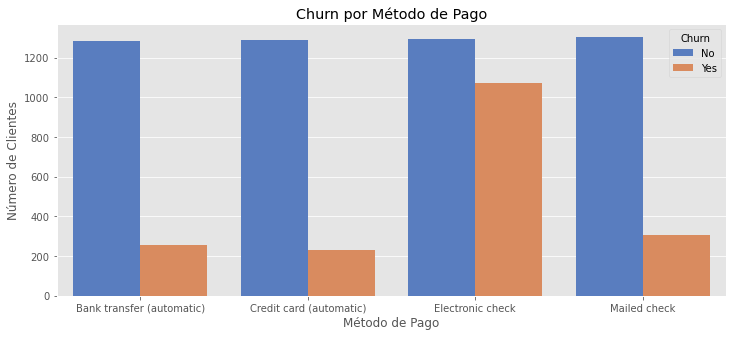

In [104]:
# Crear el recuento de churn por método de pago"
payment_churn = telco.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='Count')

# Crear gráfico
plt.figure(figsize=(12,5))
sns.barplot(data=payment_churn, x='PaymentMethod', y='Count', hue='Churn', palette='muted')

# Agregar título
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.title('Churn por Método de Pago')
plt.xticks(rotation=0) 
plt.legend(title='Churn')

# Mostrar gráfico
plt.show()

A partir del gráfico, podemos visualizar que el método de pago Electronic Check fue el que presentó el mayor número de clientes que dieron Churn. Esto puede estar asociado a un perfil financiero más inestable, a la facilidad de interrumpir el pago en comparación con las tarjetas de crédito o débito automático, o incluso a problemas en el procesamiento de este método. Además, puede ser percibido como más complejo o lento en comparación con otras opciones, lo que genera frustración y desgaste para el usuario. También requiere una acción manual para cada pago, lo que aumenta el riesgo de olvido o interrupción del servicio. 

#### 4 - ¿Cuál es el perfil de los clientes en relación con el género, el estado civil, la edad y los dependientes?

##### Distribución de Clientes por Género

A continuación, presentamos la distribución de los clientes según su género:

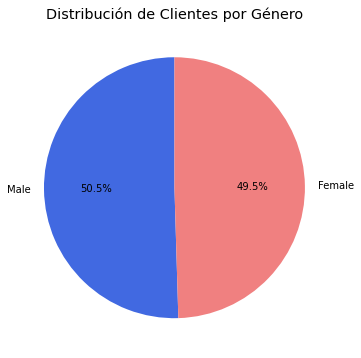

In [105]:
# Crear gráfico
plt.figure(figsize=(6, 6))
plt.pie(
    telco['gender'].value_counts(),
    labels=telco['gender'].value_counts().index,
    colors=["royalblue", "lightcoral"], 
    autopct="%1.1f%%", 
    startangle=90,
)

# Agregar título
plt.title("Distribución de Clientes por Género")

# Mostrar gráfico
plt.show()

Los datos indican que el 50,5% de los clientes son hombres y el 49,5% son mujeres.

##### Distribución de Clientes por Edad (Senioridad)

Para analizar la senioridad de los clientes, consideramos como mayores a aquellos clasificados en la base de datos con el valor 1 y como no mayores a los que tienen el valor 0.

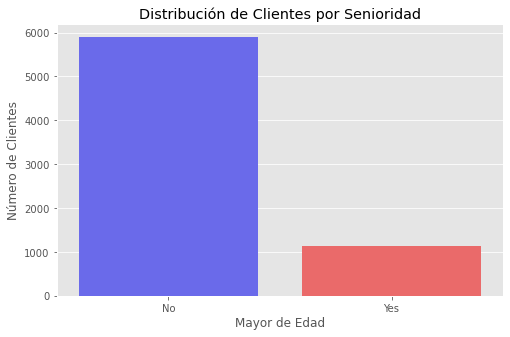

In [106]:
# Crear un diccionario para mapear los valores
senior_labels = {0: "No", 1: "Yes"}

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(
    y=telco['SeniorCitizen'].value_counts().values, 
    x=telco['SeniorCitizen'].value_counts().index.map(senior_labels), 
    palette="seismic"
)

# Agregar etiquetas
plt.title("Distribución de Clientes por Senioridad")
plt.ylabel("Número de Clientes")
plt.xlabel("Mayor de Edad")

# Mostrar gráfico
plt.show()

In [107]:
senior_perc = telco['SeniorCitizen'].value_counts(normalize=True) * 100 
print(f" En relación al total de clientes, {telco['SeniorCitizen'].value_counts()[0]} no son mayores ({senior_perc[0]:.1f}%) y {telco['SeniorCitizen'].value_counts()[1]} son mayores ({senior_perc[1]:.1f}%).")

 En relación al total de clientes, 5901 no son mayores (83.8%) y 1142 son mayores (16.2%).


##### Distribución de Clientes por Estado Civil (Pareja) 

A continuación, presentamos la distribución de clientes que tienen o no pareja:

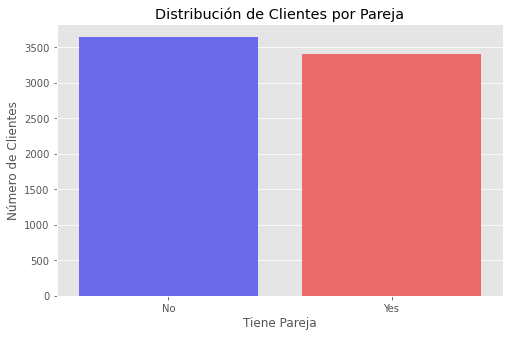

In [108]:
# Crear gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=telco['Partner'].value_counts().index, 
            y=telco['Partner'].value_counts().values, 
            palette="seismic")

# Agregar etiquetas
plt.title("Distribución de Clientes por Pareja")
plt.xlabel("Tiene Pareja")
plt.ylabel("Número de Clientes")

# Mostrar gráfico
plt.show()

In [109]:
partner_perc = telco['Partner'].value_counts(normalize=True) * 100 
print(f"De acuerdo con el grafico, {telco['Partner'].value_counts()['No']} ({partner_perc['No']:.1f}%) clientes no tienen pareja y {telco['Partner'].value_counts()['Yes']} ({partner_perc['Yes']:.1f}%) tiene pareja.")

De acuerdo con el grafico, 3641 (51.7%) clientes no tienen pareja y 3402 (48.3%) tiene pareja.


##### Distribución de Clientes por Dependientes


Por último, analizamos la cantidad de clientes que tienen o no dependientes:

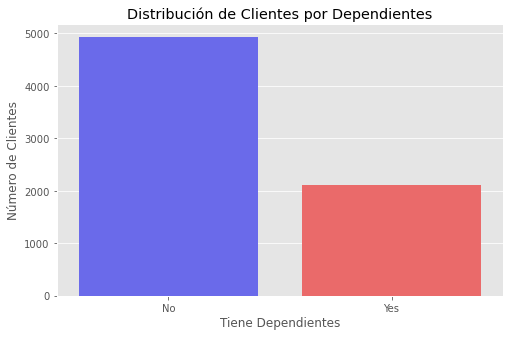

In [110]:
# Crear gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=telco['Dependents'].value_counts().index, 
            y=telco['Dependents'].value_counts().values, 
            palette="seismic")

# Agregar etiquetas
plt.title("Distribución de Clientes por Dependientes")
plt.xlabel("Tiene Dependientes")
plt.ylabel("Número de Clientes")

# Mostrar gráfico
plt.show()

In [111]:
dependents_perc = telco['Dependents'].value_counts(normalize=True) * 100 
print(f"{telco['Dependents'].value_counts()['No']} ({dependents_perc['No']:.1f}%) de los clientes no tienen dependientes y {telco['Dependents'].value_counts()['Yes']} ({dependents_perc['Yes']:.1f}%) tienen dependientes. ") 

4933 (70.0%) de los clientes no tienen dependientes y 2110 (30.0%) tienen dependientes. 


#### 5 - ¿Cómo varía la distribución del valor mensual pagado por el cliente entre aquellos que dieron churn y los que permanecieron?

Para analizar la relación entre el valor mensual pagado y el estado de churn de los clientes, utilizamos un boxplot.

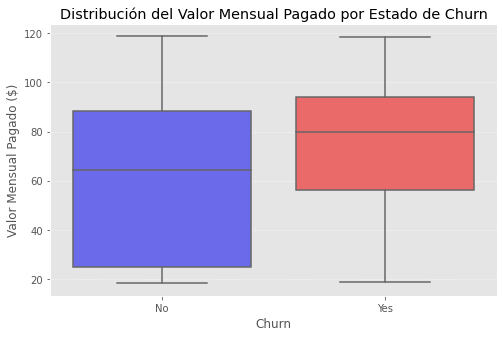

In [112]:
# Crear Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=telco, x="Churn", y="MonthlyCharges", palette="seismic")

# Ajustes en el gráfico
plt.title("Distribución del Valor Mensual Pagado por Estado de Churn")
plt.xlabel("Churn")
plt.ylabel("Valor Mensual Pagado ($)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

El análisis del boxplot revela que los clientes que permanecieron en la empresa ("No Churn") tienen una mediana de 64 dólares, con la distribución más concentrada en valores más bajos. En cambio, los clientes que cancelaron el servicio ("Churn") presentan una mediana más alta, de alrededor de 80 dólares, con una mayor dispersión en valores elevados. Esto sugiere que los **clientes con valores mensuales más altos tienden a tener una mayor tasa de cancelación.**



#### 6 - ¿Cuál es la relación entre el tiempo de permanencia y el churn?

Analicemos si hay una concentración en períodos cortos o largos y cómo esto puede estar relacionado con la cancelación del servicio.

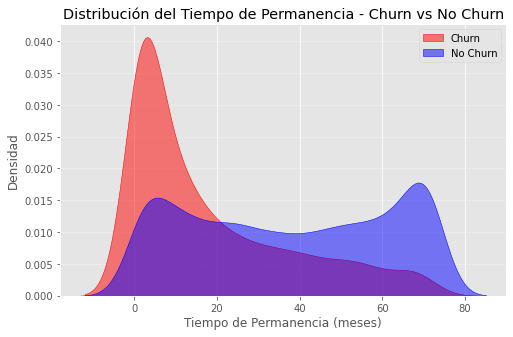

In [113]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=telco[telco["Churn"]=="Yes"], x="tenure", label="Churn", fill=True, alpha=0.5, color="red")
sns.kdeplot(data=telco[telco["Churn"]=="No"], x="tenure", label="No Churn", fill=True, alpha=0.5, color="blue")

# Ajustes en el gráfico
plt.title("Distribución del Tiempo de Permanencia - Churn vs No Churn")
plt.xlabel("Tiempo de Permanencia (meses)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

El análisis del gráfico KDE revela un patrón interesante: **la mayoría de los clientes que cancelan el servicio (churn) tienen menos de 20 meses de permanencia.** Esto sugiere un período crítico en los primeros meses, donde la probabilidad de cancelación es más alta. Este comportamiento podría estar relacionado con desafíos iniciales en la experiencia del usuario o en la propuesta de valor del servicio.

Por otro lado, los clientes que permanecen parecen tener una mayor tendencia a continuar después de este período crítico, ya que la distribución de aquellos que no dan churn (no churn) es más uniforme a lo largo del tiempo. Este patrón indica que, si un cliente supera esta fase inicial, hay una mayor probabilidad de fidelización.

#### 7 - Tener pareja y/o dependientes impacta en el churn?

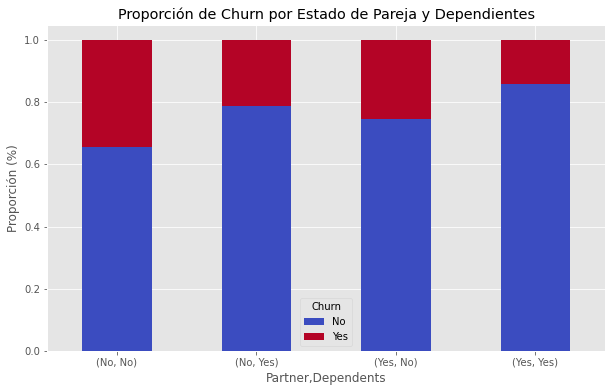

In [114]:
# Creando la tabla
churn_partner_dependents = telco.groupby(["Partner", "Dependents"])["Churn"].value_counts(normalize=True).unstack()

# Creando el gráfico de barras apiladas
churn_partner_dependents.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm")
plt.ylabel("Proporción (%)")
plt.title("Proporción de Churn por Estado de Pareja y Dependientes")
plt.xticks(rotation=0)  # Mantiene las etiquetas del eje X horizontales
plt.legend(title="Churn")
plt.show()

Entre los grupos analizados, los clientes que tienen pareja y dependientes presentan la menor tasa de churn (14%). Este comportamiento puede estar relacionado con una mayor estabilidad financiera o con una menor flexibilidad para cambiar de servicio. Por otro lado, los clientes que no tienen pareja ni dependientes muestran una mayor propensión al churn (34%).

#### 8 - ¿El género y la presencia de una pareja influyen en la tasa de churn?

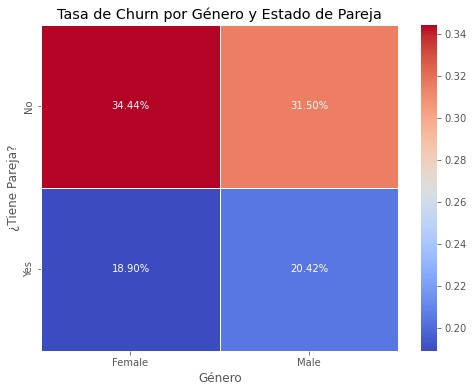

In [115]:
# Convertir "Churn" a valores numéricos (1 = Yes, 0 = No)
telco["Churn_num"] = telco["Churn"].map({"Yes": 1, "No": 0})

# Crear la tabla con la tasa de churn para cada combinación de Partner y Gender
churn_pivot = telco.pivot_table(index="Partner", columns="gender", values="Churn_num", aggfunc=np.mean)

# Crear el heatmap
plt.figure(figsize=(8,6))
sns.heatmap(churn_pivot, annot=True, cmap="coolwarm", fmt=".2%", linewidths=0.5)

# Ajustar las etiquetas
plt.title("Tasa de Churn por Género y Estado de Pareja")
plt.xlabel("Género")
plt.ylabel("¿Tiene Pareja?")
plt.show()

Según el gráfico, **las mujeres sin pareja tienen la mayor tasa de churn (34,4%)**. Los hombres sin pareja también presentan una tasa elevada (31,5%), aunque ligeramente menor que las mujeres. Las mujeres con pareja tienen la menor tasa de churn (18,9%), y los hombres con pareja también muestran una tasa reducida (20,42%), aunque ligeramente superior a la de las mujeres.

Estos resultados sugieren que tener pareja puede reducir la probabilidad de churn, especialmente en el caso de las mujeres. Las mujeres sin pareja son el grupo con mayor tasa de cancelación del servicio, lo que podría indicar que tienen necesidades o comportamientos diferentes en comparación con los otros segmentos analizados.

#### 9 - ¿Existe una correlación entre el tiempo de permanencia, la edad, el valor mensual pagado y el churn?

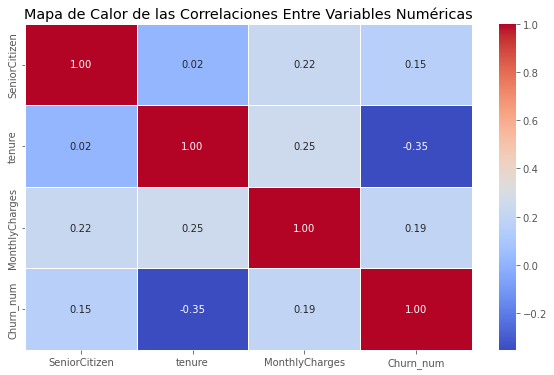

tenure          Churn_num         0.352229
                MonthlyCharges    0.247900
SeniorCitizen   MonthlyCharges    0.220173
MonthlyCharges  Churn_num         0.193356
SeniorCitizen   Churn_num         0.150889
dtype: float64


In [116]:
# Calcular la matriz de correlación
corr_matrix = telco.corr()

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de las Correlaciones Entre Variables Numéricas")
plt.show()

# Obtener las 5 correlaciones más altas en valor absoluto
corr_unstacked = corr_matrix.abs().unstack().sort_values(ascending=False)
top_5_corr = corr_unstacked[corr_unstacked < 1].drop_duplicates().head(5)

# Mostrar las 5 correlaciones más altas
print(top_5_corr)

**Correlaciones Positivas**

SeniorCitizen - MonthlyCharges: 0.22 → Los adultos mayores tienden a pagar tarifas mensuales ligeramente más altas, lo que podría indicar que contratan paquetes más completos o menos promocionales.

SeniorCitizen - Churn_num: 0.15 → Los adultos mayores tienen una ligera tendencia a cancelar más en comparación con otros grupos.

tenure - MonthlyCharges: 0.25 → Los clientes con mayor tiempo de permanencia pagan tarifas mensuales ligeramente más altas.

MonthlyCharges - Churn_num: 0.19 → Los clientes que pagan más por mes tienen una mayor probabilidad de churn. Esto sugiere que los planes más costosos pueden estar asociados con mayor insatisfacción o dificultades de pago.

**Correlaciones Negativas**
    
SeniorCitizen - tenure: -0.02 → Relación casi nula, lo que indica que la edad no parece influir directamente en el tiempo de permanencia del cliente.

tenure - Churn_num: -0.35 → A mayor tiempo de permanencia, menor probabilidad de churn. Esto tiene sentido, ya que los clientes que han estado más tiempo en el servicio probablemente han encontrado valor en él y tienen menos incentivos para cancelarlo.


### Resultados e Perspectivas para la Reducción del Churn

* El análisis revela que los clientes con mayor gasto mensual son más propensos al churn. Se recomienda ofrecer descuentos progresivos o beneficios exclusivos para clientes con planes más costosos, así como crear un programa de fidelización para clientes premium, incentivando la retención.


* El churn ocurre principalmente en los primeros meses, lo que indica un período crítico en el que la probabilidad de cancelación es mayor. Este comportamiento puede estar relacionado con desafíos iniciales en la experiencia del usuario o con la propuesta de valor del servicio. Para mitigar este problema, es clave mejorar la experiencia en los primeros meses, alinear expectativas en el proceso de venta para evitar frustraciones e implementar encuestas de satisfacción.


* Es recomendable diseñar planes, ofertas personalizadas y beneficios adicionales para determinados grupos con mayor tasa de churn, como personas mayores, clientes sin pareja ni dependientes y mujeres sin pareja. Además, se sugiere investigar las razones específicas que llevan a estos grupos a cancelar el servicio.


* Los clientes antiguos tienden a permanecer más tiempo y presentan una menor probabilidad de cancelar. Por ello, la creación de programas de fidelización y recompensas, junto con la mejora continua de la experiencia del cliente, puede aumentar la satisfacción y reducir las cancelaciones.


* Informar a los usuarios sobre métodos de pago más convenientes y seguros, como las tarjetas de crédito (ya que, al ser automáticos, reducen la probabilidad de errores en los cobros), ofrecer beneficios a quienes cambien a pagos automáticos, mejorar el soporte y optimizar el proceso de pago mediante Electronic Check para reducir fallos.


* Además de las recomendaciones anteriores, es fundamental recopilar comentarios constantes de los clientes para identificar los principales factores que impulsan el churn y mejorar las estrategias de retención.

### Conclusión

Este proyecto tuvo como objetivo analizar el perfil de los clientes e identificar los principales factores asociados al churn, generando insights estratégicos para reducir cancelaciones y aumentar la retención. Monitorear la tasa de churn es fundamental para comprender la salud del negocio, orientar decisiones estratégicas y mejorar la experiencia del cliente.

Además de las recomendaciones basadas en el análisis descriptivo, un próximo paso será la aplicación de técnicas de machine learning para predecir la probabilidad de churn. Esto permitirá implementar acciones preventivas más precisas, como ofertas personalizadas, campañas de fidelización y mejoras enfocadas en la experiencia del cliente. Este avance no solo contribuirá a la retención de clientes, sino que también demostrará la aplicación práctica de técnicas analíticas más avanzadas, reforzando mi aprendizaje continuo en el área de Data Science.

**Agradezco que hayas dedicado tu tiempo a leer mi proyecto. Quedo a disposición para recibir comentarios y sugerencias.**